**2.1 TIỀN XỬ LÝ DỮ LIỆU**

Import

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Đọc dữ liệu

In [2]:
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", header=0)
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Thông tin về dữ liệu

In [3]:
# Ý nghĩa của các đặc trưng

data_dictionary = {
    "Column Name": ["Gender", "Age", "Height", "Weight", 
                    "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O",
                    "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"
                    ],
    "Type": ["Feature, Categorical", "Feature, Continuous", "Feature, Continuous", 
             "Feature, Continuous", "Feature, Binary", "Feature, Binary", 
             "Feature, Integer", "Feature, Continuous", "Feature, Categorical", "Feature, Binary",
             "Feature, Continuous", "Feature, Binary", "Feature, Continuous", "Feature, Integer", 
             "Feature, Categorical", "Feature, Categorical", "Target, Categorical"],
    "Description": [
        "Gender",
        "Age",
        "Height",
        "Weight",
        "Has a family member suffered or suffers from overweight?",
        "Do you eat high caloric food frequently?",
        "Do you usually eat vegetables in your meals?",
        "How many main meals do you have daily?",
        "Do you eat any food between meals?",
        "Do you smoke?",
        "How much water do you drink daily?",
        "Do you monitor the calories you eat daily?",
        "How often do you have physical activity?",
        "How much time do you use technological devices such as cell phone, videogames, television, computer and others?",
        "How often do you drink alcohol?",
        "Which transportation do you usually use?",
        "Obesity level"
    ]
}

df_dict = pd.DataFrame(data_dictionary)
print(tabulate(df_dict, headers="keys"))

    Column Name                     Type                  Description
--  ------------------------------  --------------------  ---------------------------------------------------------------------------------------------------------------
 0  Gender                          Feature, Categorical  Gender
 1  Age                             Feature, Continuous   Age
 2  Height                          Feature, Continuous   Height
 3  Weight                          Feature, Continuous   Weight
 4  family_history_with_overweight  Feature, Binary       Has a family member suffered or suffers from overweight?
 5  FAVC                            Feature, Binary       Do you eat high caloric food frequently?
 6  FCVC                            Feature, Integer      Do you usually eat vegetables in your meals?
 7  NCP                             Feature, Continuous   How many main meals do you have daily?
 8  CAEC                            Feature, Categorical  Do you eat any food between mea

In [4]:
# Số lượng các giá trị khác biệt trong từng đặc trưng

data.nunique()

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [5]:
# Số lượng của mỗi giá trị trong các đặc trưng

for col in data.columns:
    print(f'The column:{col}\nvalues_count:\n{data[col].value_counts()}\n\n')

The column:Age
values_count:
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64


The column:Gender
values_count:
Gender
Male      1068
Female    1043
Name: count, dtype: int64


The column:Height
values_count:
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64


The column:Weight
values_count:
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64


The column:CALC
values_count:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dty

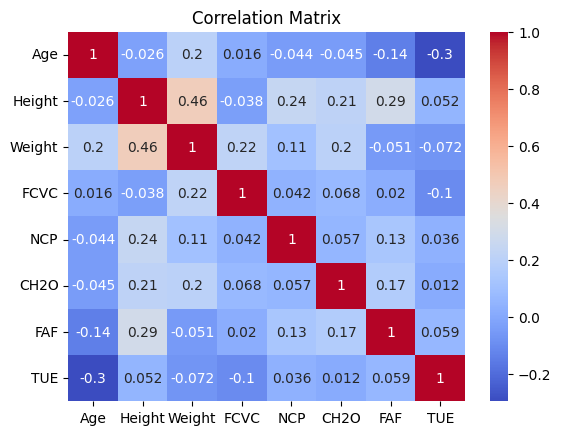

In [6]:
# Ma trận tương quan

numerical_df = data.select_dtypes(include=['float64'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Thực hiện chuyển dữ liệu về dạng phù hợp

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


In [8]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
y = y.to_numpy()

In [9]:
X.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3


In [10]:
y

array([1, 1, 1, ..., 4, 4, 4])

In [11]:
# Lưu dữ liệu sang file csv

X.to_csv('D:/HUS_22001541/MachineLearning/Project/data/X_data.csv', index=False)
pd.DataFrame(y).to_csv('D:/HUS_22001541/MachineLearning/Project/data/y_data.csv', index=False)

**2.2 PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU**

In [12]:
# Chuẩn hóa dữ liệu

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.52212439, -1.01191369, -0.87558934, ...,  0.56199675,
         0.30034556,  0.50333674],
       [-0.52212439, -1.01191369, -1.94759928, ..., -1.08062463,
         0.30034556,  0.50333674],
       [-0.20688898,  0.98822657,  1.05402854, ...,  0.56199675,
         0.30034556,  0.50333674],
       ...,
       [-0.28190933, -1.01191369,  0.54167211, ..., -0.01901815,
         0.30034556,  0.50333674],
       [ 0.00777624, -1.01191369,  0.40492652, ..., -0.11799101,
         0.30034556,  0.50333674],
       [-0.10211908, -1.01191369,  0.39834438, ...,  0.09243207,
         0.30034556,  0.50333674]])

In [13]:
# Giảm chiều dữ liệu

pca = PCA(n_components=6)  # Trích xuất 6 thành phần chính
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Thống kê các thành phần chính

explained_variances = pca.explained_variance_ratio_
print("Tỷ lệ phương sai giải thích của từng thành phần chính:")
for i, var in enumerate(explained_variances, start=1):
    print(f"Thành phần chính {i}: {var:.2%}")

Tỷ lệ phương sai giải thích của từng thành phần chính:
Thành phần chính 1: 16.28%
Thành phần chính 2: 11.65%
Thành phần chính 3: 9.56%
Thành phần chính 4: 8.48%
Thành phần chính 5: 7.03%
Thành phần chính 6: 6.67%


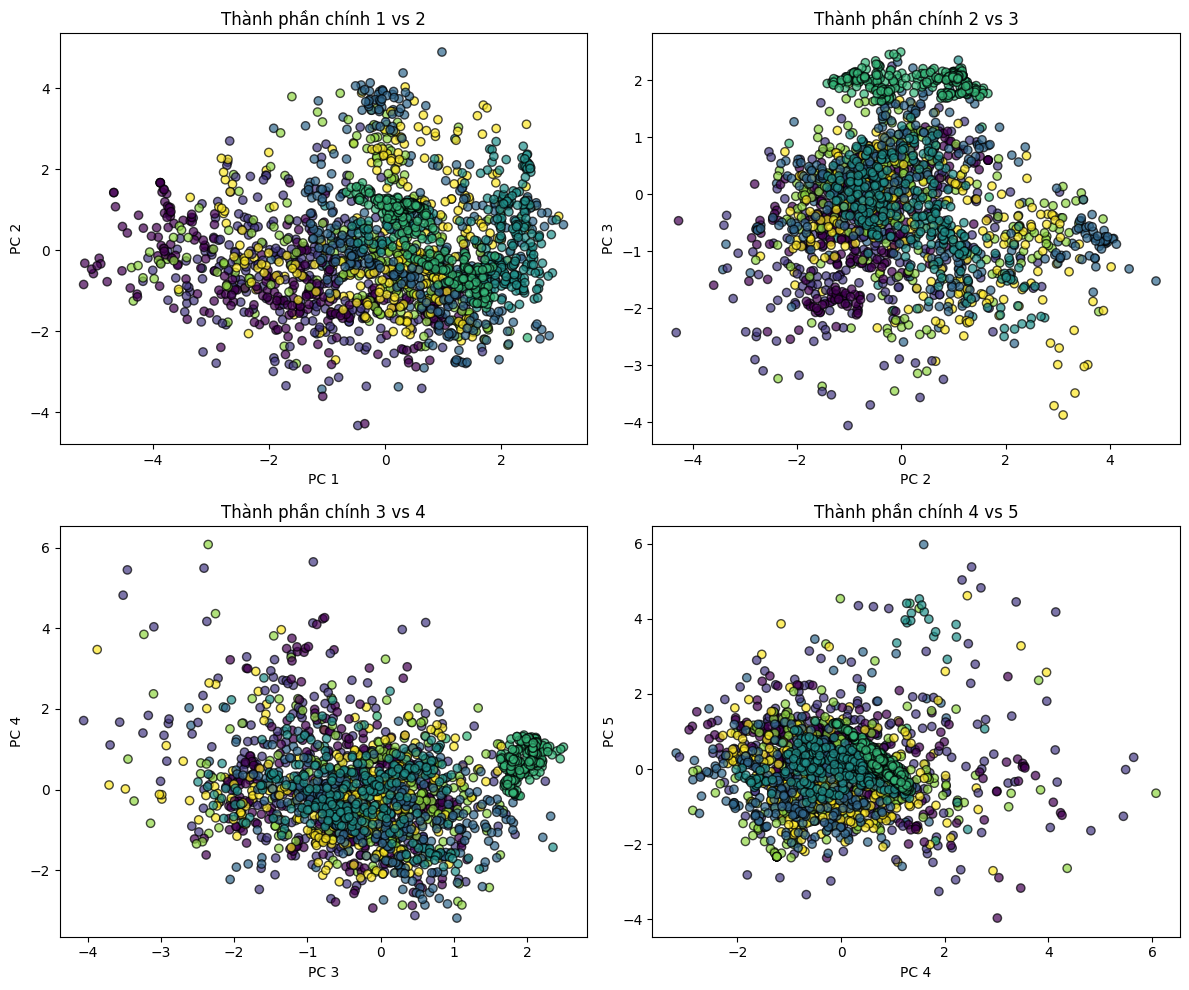

In [16]:
# Trực quan hóa dữ liệu theo từng cặp thành phần chính

plt.figure(figsize=(12, 10))
pairs = [(0, 1), (1, 2), (2, 3), (3, 4)]  # Chọn 4 cặp thành phần chính để hiển thị
for i, (a, b) in enumerate(pairs):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_pca[:, a], X_pca[:, b], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.title(f"Thành phần chính {a+1} vs {b+1}")
    plt.xlabel(f"PC {a+1}")
    plt.ylabel(f"PC {b+1}")
plt.tight_layout()
plt.show()

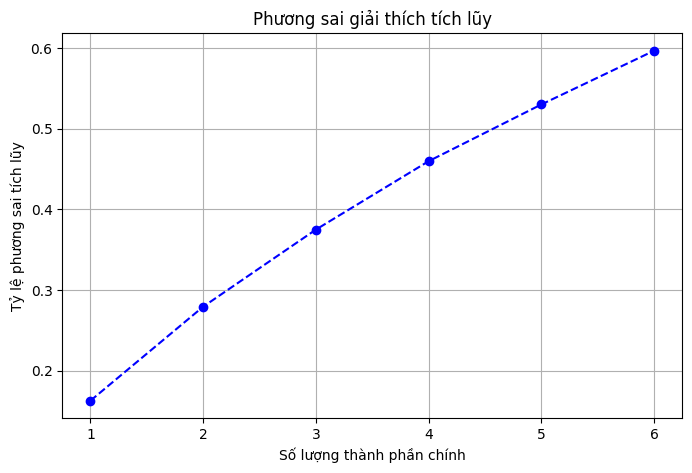

In [17]:
# Hiển thị phương sai giải thích tích lũy

plt.figure(figsize=(8, 5))
cumulative_variances = np.cumsum(explained_variances)
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, marker='o', linestyle='--', color='b')
plt.title("Phương sai giải thích tích lũy")
plt.xlabel("Số lượng thành phần chính")
plt.ylabel("Tỷ lệ phương sai tích lũy")
plt.grid()
plt.show()

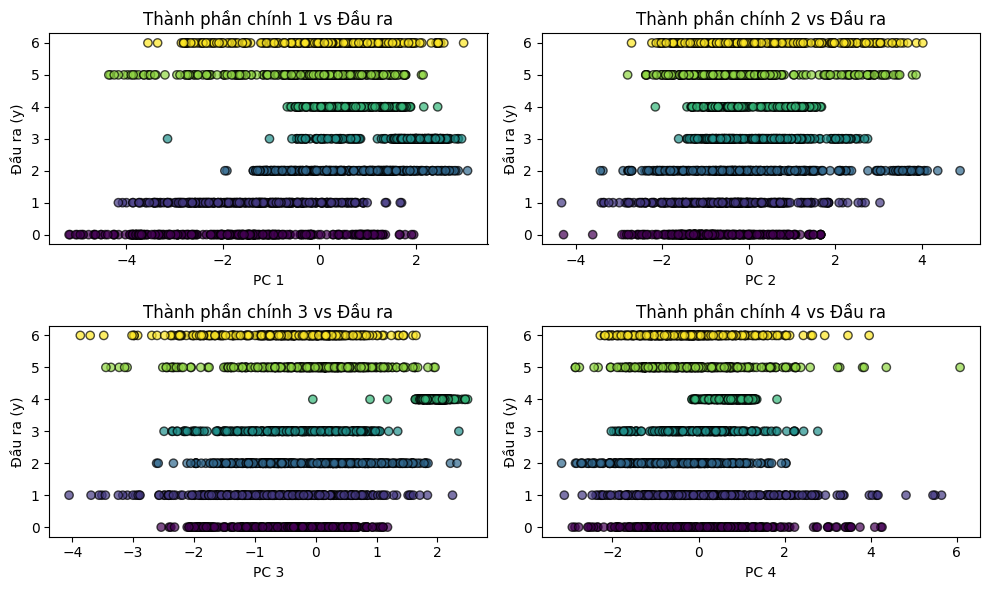

In [18]:
# Trực quan hóa mối quan hệ giữa thành phần chính và đầu ra

plt.figure(figsize=(10, 6))
for i in range(4):  # Hiển thị 4 thành phần đầu tiên
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_pca[:, i], y, c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.title(f"Thành phần chính {i+1} vs Đầu ra")
    plt.xlabel(f"PC {i+1}")
    plt.ylabel("Đầu ra (y)")
plt.tight_layout()
plt.show()